# Project: Wrangling and Analyze Data

### Content
- [Project Objectives](#obj)
- [Import Libraries](#import)
- [Step 1: Gathering data](#gather)
- [Step 2: Assessing data](#access)
- [Step 3: Cleaning data](#clean)
- [Step 4: Storing data](#store)
- [Step 5: Analyzing, and visualizing data](#analyze)
- [Step 6: Reporting](#report)

<a id='obj'></a>
## Project objectives

### Goal 
Wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"- worthy analyses and visualizations.

### Objectives
- Perform data wrangling on the provided sources (three) of data.
    - Gathering: Data would be gathered in three different ways;
        - Download/Uploaded: WeRateDogs Twitter archive containing basic tweet data for all 5000+ of their tweets.
        - Scrapping: Image prediction file. Prdiction file through neural network for classification. The results are a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).
        - API: Query Twitter's API to gather valuable data for the WeRateDogs Twitter archive and specifically the tweet IDs within it.
    - Assessing and 
    - Cleaning
- Store, analyze, and visualize the wrangled data.
- Reporting on:
    - data wrangling efforts and
    - data analyses and visualizations.

### Additional Project Requirement
- In the analysis, only original tweets/ratings that have images should be used (no retweets nor replies).

<a id='import'></a>
## Importing Libraries

In [1]:
# Importing libraries
import requests
import pandas as pd
import numpy as np
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline
import json
import tweepy
import os
import glob

<a id='gather'></a>
## Gathering Data
In the cell below, gather all three pieces of data for this project and load them in the notebook. Note: the methods required to gather each data are different.

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
#read csv file after download manually
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# preview
twitter_archive.sample(2)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
22    887517139158093824                    NaN                  NaN   
2221  668480044826800133                    NaN                  NaN   

                      timestamp  \
22    2017-07-19 03:39:09 +0000   
2221  2015-11-22 17:23:57 +0000   

                                                 source  \
22    <a href="http://twitter.com/download/iphone" r...   
2221  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
22    I've yet to rate a Venezuelan Hover Wiener. Th...                  NaN   
2221  Say hello to DayZ. She is definitely stuck on ...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
22                         NaN                        NaN   
2221                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
22    https://twitter.com/dog_rates/status/887517139...                14   
2221  https://twitter.com/dog_rates/status/668480044...                11   

      rating_denominator  name doggo floofer pupper puppo  
22                    10  such  None    None   None  None  
2221                  10  DayZ  None    None   None  None

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
# download image_predictions using the request library
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image_predictions.tsv', mode ='wb') as file:
    file.write(response.content)

In [5]:
# Read tsv file after download via request
prediction = pd.read_csv('image_predictions.tsv', sep='\t')

In [6]:
# preview
prediction.sample(2)

tweet_id                                          jpg_url  \
257   670778058496974848  https://pbs.twimg.com/media/CU8VFhuVAAAQW8B.jpg   
1578  796149749086875649  https://pbs.twimg.com/media/Cwx99rpW8AMk_Ie.jpg   

      img_num                p1   p1_conf  p1_dog                  p2  \
257         1               pug  0.776612    True   Brabancon_griffon   
1578        1  golden_retriever  0.600276    True  Labrador_retriever   

       p2_conf  p2_dog         p3   p3_conf  p3_dog  
257   0.112032    True      boxer  0.039051    True  
1578  0.140798    True  seat_belt  0.087355   False

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [7]:
# consumer_key = 'XXXX'
# consumer_secret = 'XXXX'
# access_token = 'XXXXs'
# access_secret = 'XXXX'

# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth)

Make a list of all twitter ids and iteratively get all tweets via the twitter api for tweet ids.

In [8]:
# tweet_ids = list(twitter_archive.tweet_id)

# tweet_data = {}
# for tweet in tweet_ids:
#     try:
#         tweet_status = api.get_status(tweet)
#         tweet_data[str(tweet)] = tweet_status._json
#     except:
#         print("Error for: " + str(tweet))

Since The data that should be gathered via twitter API (by the previous code) is supported in the project resources by Udacity as zip file, I would just load the zip and read.

In [9]:
# Load
tweets_txt = [json.loads(file) for file in open('tweet-json.txt','r')]

# check for the extracted file
tweets_txt

[{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
  'id': 892420643555336193,
  'id_str': '892420643555336193',
  'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
  'truncated': False,
  'display_text_range': [0, 85],
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [],
   'urls': [],
   'media': [{'id': 892420639486877696,
     'id_str': '892420639486877696',
     'indices': [86, 109],
     'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'url': 'https://t.co/MgUWQ76dJU',
     'display_url': 'pic.twitter.com/MgUWQ76dJU',
     'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
     'type': 'photo',
     'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
      'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
      'small': {'w': 540, 'h': 528, 'resize': 'fit'},

<a id='access'></a>
## Assessing data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

**So now we have the three dataset:**
1. twitter archive uploaded directly: `twitter_archive`
2. image prediction via request: `prediction`
3. tweets via api: `tweets_txt`

Next we visually assesss the data one after the other.

In [10]:
# twitter_archive
twitter_archive.sample(6)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1855  675531475945709568                    NaN                  NaN   
1134  728653952833728512                    NaN                  NaN   
425   821421320206483457                    NaN                  NaN   
1993  672609152938721280                    NaN                  NaN   
1170  720775346191278080                    NaN                  NaN   
449   819004803107983360                    NaN                  NaN   

                      timestamp  \
1855  2015-12-12 04:23:49 +0000   
1134  2016-05-06 18:33:34 +0000   
425   2017-01-17 18:17:58 +0000   
1993  2015-12-04 02:51:33 +0000   
1170  2016-04-15 00:46:48 +0000   
449   2017-01-11 02:15:36 +0000   

                                                 source  \
1855  <a href="http://twitter.com/download/iphone" r...   
1134  <a href="http://twitter.com/download/iphone" r...   
425   <a href="http://twitter.com/download/iphone" r...   
1993  <a href="http://twitter.com/download/iphone" r...   
1170  <a href="http://twitter.com/download/iphone" r...   
449   <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
1855  This is Ellie AKA Queen Slayer of the Orbs. Ve...                  NaN   
1134  This is Coleman. Somebody needs to tell him th...                  NaN   
425   RT @dog_rates: This is Sampson. He just gradua...         7.823059e+17   
1993  This is Caryl. Likes to get in the microwave. ...                  NaN   
1170  This is Berkeley. He's in a predicament. 10/10...                  NaN   
449   This is Bo. He was a very good First Doggo. 14...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
1855                       NaN                        NaN   
1134                       NaN                        NaN   
425               4.196984e+09  2016-10-01 19:47:08 +0000   
1993                       NaN                        NaN   
1170                       NaN                        NaN   
449                        NaN                        NaN   

                                          expanded_urls  rating_numerator  \
1855  https://twitter.com/dog_rates/status/675531475...                10   
1134  https://twitter.com/dog_rates/status/728653952...                 8   
425   https://twitter.com/dog_rates/status/782305867...                12   
1993  https://twitter.com/dog_rates/status/672609152...                 9   
1170  https://twitter.com/dog_rates/status/720775346...                10   
449   https://twitter.com/dog_rates/status/819004803...                14   

      rating_denominator      name  doggo floofer pupper puppo  
1855                  10     Ellie   None    None   None  None  
1134                  10   Coleman   None    None   None  None  
425                   10   Sampson  doggo    None   None  None  
1993                  10     Caryl   None    None   None  None  
1170                  10  Berkeley   None    None   None  None  
449                   10        Bo  doggo    None   None  None

In [11]:
# Check info
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
twitter_archive.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [13]:
# iterate over columns for duplicates using a function
def check_dup(df):
    """
    A function that every column of a dataframe for duplicates.
    Inputs:
    :param df: Dataframe.
    Outputs:
    A list of all duplicate column.
    """
    dup_list = []
    for col in df:
        if df[col].duplicated().sum() > 0:
            dup_list.append(col)
    return dup_list

check_dup(twitter_archive)

['in_reply_to_status_id',
 'in_reply_to_user_id',
 'source',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

__Observations:__
- Some interesting duplicates for source, and expanded_urls columns.
- Info and sample methods shows som missing data, erronous datatypes, and some invalid data for names, doggo, floofer, pupper and puppo.
- describe method shows that the maximum ratings for numerators and denominator not valid, the mean, 25%,50% and 75% shows more realistic values.

Let's take a closer look at names, doggo, floofer, pupper, puppo, and ratings.

__name cloumn:__

In [14]:
# check for name column
twitter_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [15]:
# check if dog's name are all titled column
twitter_archive.name.str.istitle().value_counts()

True     2241
False     115
Name: name, dtype: int64

In [16]:
# Check to see unique names of dogs in lower case
twitter_archive.name.loc[twitter_archive.name.str.istitle() == False].unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'BeBe', 'mad',
       'an', 'very', 'just', 'DonDon', 'my', 'his', 'actually', 'getting',
       'this', 'unacceptable', 'all', 'old', 'infuriating', 'CeCe', 'the',
       'by', 'officially', 'life', 'light', 'space', 'JD', 'DayZ'],
      dtype=object)

__Rating Columns:__

In [17]:
# check for rating_denominator values that are not 10
pd.set_option('display.max_colwidth', None)
twitter_archive.loc[twitter_archive.rating_denominator != 10 , ['tweet_id', 'text','name','rating_numerator','rating_denominator']]

tweet_id  \
313   835246439529840640   
342   832088576586297345   
433   820690176645140481   
516   810984652412424192   
784   775096608509886464   
902   758467244762497024   
1068  740373189193256964   
1120  731156023742988288   
1165  722974582966214656   
1202  716439118184652801   
1228  713900603437621249   
1254  710658690886586372   
1274  709198395643068416   
1351  704054845121142784   
1433  697463031882764288   
1598  686035780142297088   
1634  684225744407494656   
1635  684222868335505415   
1662  682962037429899265   
1663  682808988178739200   
1779  677716515794329600   
1843  675853064436391936   
2335  666287406224695296   

                                                                                                                                                                           text  \
313                                                                          @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho   
342                                                                                                                                    @docmisterio account started on 11/15/15   
433                                                                         The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd   
516   Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx   
784                                RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…   
902                                                                                              Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE   
1068                               After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ   
1120                                                  Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv   
1165                                                                                                           Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a   
1202                                                      This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq   
1228                                                                              Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1   
1254                                                               Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12   
1274                         From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK   
1351                                                                                         Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa   
1433                                                                               Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ   
1598                                   Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating   
1634                                             Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3   
1635                               Someone help the girl is being mugged. Several are distracting her while two steal her

In [18]:
# check for rating_numerator values that are > 14. From overview numerators rating is almost always greater than 10.
# 11/10, 12/10, 13/10 e.t.c and mean is about 13 so we check for above that
twitter_archive.loc[twitter_archive.rating_numerator > 14, ['tweet_id', 'text', 'name','rating_numerator','rating_denominator']]

tweet_id  \
55    881633300179243008   
188   855862651834028034   
189   855860136149123072   
285   838916489579200512   
290   838150277551247360   
291   838085839343206401   
313   835246439529840640   
340   832215909146226688   
433   820690176645140481   
516   810984652412424192   
695   786709082849828864   
763   778027034220126208   
902   758467244762497024   
979   749981277374128128   
1120  731156023742988288   
1202  716439118184652801   
1228  713900603437621249   
1254  710658690886586372   
1274  709198395643068416   
1351  704054845121142784   
1433  697463031882764288   
1634  684225744407494656   
1635  684222868335505415   
1663  682808988178739200   
1712  680494726643068929   
1779  677716515794329600   
1843  675853064436391936   
2074  670842764863651840   

                                                                                                                                                                           text  \
55                                                                                  @roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s   
188                                                                                      @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research   
189                                       @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10   
285                                                                             RT @KibaDva: I collected all the good dogs!! 15/10 @dog_rates #GoodDogs https://t.co/6UCGFczlOI   
290                                                                                                                                                          @markhoppus 182/10   
291                                                                                                             @bragg6of8 @Andy_Pace_ we are still looking for the first 15/10   
313                                                                          @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho   
340                                RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…   
433                                                                         The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd   
516   Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx   
695                                            This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS   
763           This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq   
902                                                                                              Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE   
979                                                                                              This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh   
1120                                                  Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv   
1202                                                      This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq   
1228                                                                              Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://

In [19]:
# we will also check for rating_numerator values that are < 10
twitter_archive.loc[twitter_archive.rating_numerator < 10, ['tweet_id', 'text', 'name','rating_numerator','rating_denominator']]

tweet_id  \
45    883482846933004288   
229   848212111729840128   
315   835152434251116546   
387   826598799820865537   
462   817502432452313088   
...                  ...   
2351  666049248165822465   
2352  666044226329800704   
2353  666033412701032449   
2354  666029285002620928   
2355  666020888022790149   

                                                                                                                                                                    text  \
45                              This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948   
229   This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1   
315                                                    When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag   
387                                                                                                I was going to do 007/10, but the joke wasn't worth the &lt;10 rating   
462                         RT @dog_rates: Meet Herschel. He's slightly bigger than ur average pupper. Looks lonely. Could probably ride 7/10 would totally pet https:/…   
...                                                                                                                                                                  ...   
2351                                            Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq   
2352                           This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx   
2353                                  Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR   
2354                         This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI   
2355                                 Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj   

          name  rating_numerator  rating_denominator  
45       Bella                 5                  10  
229      Jerry                 6                  10  
315       None                 0                  10  
387       None                 7                  10  
462   Herschel                 7                  10  
...        ...               ...                 ...  
2351      None                 5                  10  
2352         a                 6                  10  
2353         a                 9                  10  
2354         a                 7                  10  
2355      None                 8                  10  

[440 rows x 5 columns]

From comments we can see some interesting infomation
- it seems there was some inaccuracies in coding comments to ratings, we will take note of their tweet_ids.
    - 716439118184652801: 50/50 instead of 11/10
    - 682962037429899265: 7/11 instead of 10/10
    - 666287406224695296: 1/2 instead of 9/10
    - 881633300179243008: 17/10 instead of 13/10
    - 832215909146226688 and 786709082849828864: 75/10 instead of 9.75
    - 716439118184652801: 50/50 instead of 11/10
    - 680494726643068929: 26/10 instead of 11.26/10
    - 883482846933004288: 5/10 instead of 13.5/10
    - 835246439529840640: 960/00 instead of 13/10
- these ratings also shows that float is the correct datatype for the ratings
- Also ratings of above 10 seems to have more than one dog in the linked photo and ratings were multiplied by the number of dogs, e.g 713900603437621249: 99/90 for 9 dogs instead of 11/10, 709198395643068416: 45/50 for 5 dogs instead of 9/10, 704054845121142784: 60/50 for 5 dogs instead of 12/10 and so on.

Since doggo, floofer, pupper, puppo has a major tidiness issue we would address in the cleaning stage before investigating them further.

In [20]:
# check source duplicates
twitter_archive.source.duplicated().sum()

2352

In [21]:
# check source uniques
twitter_archive.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [22]:
# check source value_counts
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [23]:
# check expanded_urls duplicates
twitter_archive.expanded_urls.duplicated().sum()

137

In [24]:
twitter_archive.expanded_urls.isnull().value_counts()
# twitter_archive.expanded_urls.loc[twitter_archive.expanded_urls.isnull() == True]

False    2297
True       59
Name: expanded_urls, dtype: int64

In [25]:
prediction.sample(15)

tweet_id  \
1496  783391753726550016   
899   699788877217865730   
1076  717421804990701568   
1527  788908386943430656   
972   706644897839910912   
1382  765395769549590528   
1616  802265048156610565   
1058  714957620017307648   
132   668466899341221888   
315   671735591348891648   
1990  873213775632977920   
759   688804835492233216   
112   667911425562669056   
1595  798925684722855936   
553   677573743309385728   

                                                                                      jpg_url  \
1496                                          https://pbs.twimg.com/media/Ct8qn8EWIAAk9zP.jpg   
899                                           https://pbs.twimg.com/media/CbYmRHyWEAASNzm.jpg   
1076                                          https://pbs.twimg.com/media/CfTLUYWXEAEkyES.jpg   
1527                                          https://pbs.twimg.com/media/CvLD-mbWYAAFI8w.jpg   
972   https://pbs.twimg.com/ext_tw_video_thumb/706644797256241152/pu/img/NTqvmIUQExGmKFSR.jpg   
1382                                          https://pbs.twimg.com/media/Cp87Y0jXYAQyjuV.jpg   
1616                                          https://pbs.twimg.com/media/CyI3zXgWEAACQfB.jpg   
1058                                          https://pbs.twimg.com/media/CewKKiOWwAIe3pR.jpg   
132                                           https://pbs.twimg.com/media/CUbfGbbWoAApZth.jpg   
315                                           https://pbs.twimg.com/media/CVJ79MzW4AEpTom.jpg   
1990                                          https://pbs.twimg.com/media/DB5HTBGXUAE0TiK.jpg   
759                                           https://pbs.twimg.com/media/CY8gWFRWUAAm1XL.jpg   
112                                           https://pbs.twimg.com/media/CUTl5m1WUAAabZG.jpg   
1595                                          https://pbs.twimg.com/media/CxZaqh_WQAA7lY3.jpg   
553                                           https://pbs.twimg.com/media/CWc5uVPXIAErLYr.jpg   

      img_num                           p1   p1_conf  p1_dog  \
1496        4           Norwegian_elkhound  0.877130    True   
899         1               Border_terrier  0.355060    True   
1076        2           miniature_pinscher  0.286479    True   
1527        1               remote_control  0.881538   False   
972         1                 space_heater  0.137871   False   
1382        1                     Pembroke  0.509491    True   
1616        1           Labrador_retriever  0.897162    True   
1058        1               Great_Pyrenees  0.251516    True   
132         1              shopping_basket  0.398361   False   
315         2                   stone_wall  0.271121   False   
1990        1                       vizsla  0.619782    True   
759         3                     malinois  0.199512    True   
112         1               frilled_lizard  0.257695   False   
1595        1  West_Highland_white_terrier  0.539463    True   
553         2                        patio  0.535070   False   

                     p2   p2_conf  p2_dog                        p3   p3_conf  \
1496              cairn  0.086241    True                  keeshond  0.011019   
899          toy_poodle  0.169736    True        Norwegian_elkhound  0.099884   
1076  Italian_greyhound  0.084134    True                    beagle  0.064697   
1527       oscilloscope  0.035513   False          golden_retriever  0.034090   
972           Chihuahua  0.132928    True                    cougar  0.113866   
1382           Cardigan  0.330401    True         Shetland_sheepdog  0.038875   
1616             beagle  0.016895    True       Rhodesian_ridgeback  0.012061   
1058            Samoyed  0.139346    True                    kuvasz  0.129005   
132              hamper  0.363222   False                  bassinet  0.084173   
315     Irish_wolfhound  0.063078    True                    poncho  0.048226   
1990         bloodhound  0.338069    True  Chesapeake_Bay_retriever  0.012676   
759     German_sh

In [26]:
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
prediction.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

__Observation:__

- From the describe we can see that the mean confidence of predicting dogs as breed 2 and 3 is less than 15%
- img_num has no information.
- p1_dog to p3_dog shows dog predictions true or false and p1 to p3 shows the dog breed or animal in the image.

First we need to check for predictions that are not dogs

In [28]:
prediction[(prediction["p1_dog"] == False) & (prediction["p2_dog"] == False) & (prediction["p3_dog"] == False)]

tweet_id  \
6     666051853826850816   
17    666104133288665088   
18    666268910803644416   
21    666293911632134144   
25    666362758909284353   
...                  ...   
2021  880935762899988482   
2022  881268444196462592   
2046  886680336477933568   
2052  887517139158093824   
2074  892420643555336193   

                                                                                      jpg_url  \
6                                             https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
17                                            https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18                                            https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
21                                            https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg   
25                                            https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg   
...                                                                                       ...   
2021                                          https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg   
2022                                          https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg   
2046                                          https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg   
2052  https://pbs.twimg.com/ext_tw_video_thumb/887517108413886465/pu/img/WanJKwssZj4VJvL9.jpg   
2074                                          https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                p1   p1_conf  p1_dog               p2   p2_conf  \
6           1        box_turtle  0.933012   False       mud_turtle  0.045885   
17          1               hen  0.965932   False             cock  0.033919   
18          1  desktop_computer  0.086502   False             desk  0.085547   
21          1  three-toed_sloth  0.914671   False            otter  0.015250   
25          1        guinea_pig  0.996496   False            skunk  0.002402   
...       ...               ...       ...     ...              ...       ...   
2021        1       street_sign  0.251801   False         umbrella  0.115123   
2022        1            tusker  0.473303   False  Indian_elephant  0.245646   
2046        1       convertible  0.738995   False       sports_car  0.139952   
2052        1         limousine  0.130432   False        tow_truck  0.029175   
2074        1            orange  0.097049   False            bagel  0.085851   

      p2_dog              p3   p3_conf  p3_dog  
6      False        terrapin  0.017885   False  
17     False       partridge  0.000052   False  
18     False        bookcase  0.079480   False  
21     False  great_grey_owl  0.013207   False  
25     False         hamster  0.000461   False  
...      ...             ...       ...     ...  
2021   False   traffic_light  0.069534   False  
2022   False            ibex  0.055661   False  
2046   False       car_wheel  0.044173   False  
2052   False   shopping_cart  0.026321   False  
2074   False          banana  0.076110   False  

[324 rows x 12 columns]

It seems the neural network prediction for none dog breed is good.

From describe it appears that p1_dog had the highest dog prediction so we would check for when p1 was false and the others were true

In [29]:
# Checking selection when the 2nd or 3rd probabilities are dogs
prediction[(prediction["p1_dog"] == False) & (prediction["p2_dog"] == True) & (prediction["p3_dog"] == True)]

tweet_id  \
22    666337882303524864   
43    666776908487630848   
95    667550904950915073   
103   667806454573760512   
108   667878741721415682   
...                  ...   
1858  841833993020538882   
1896  850145622816686080   
1904  852189679701164033   
1984  872122724285648897   
2013  879376492567855104   

                                                                                      jpg_url  \
22                                            https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg   
43                                            https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg   
95                                            https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg   
103                                           https://pbs.twimg.com/media/CUSGbXeVAAAgztZ.jpg   
108                                           https://pbs.twimg.com/media/CUTILFiWcAE8Rle.jpg   
...                                                                                       ...   
1858  https://pbs.twimg.com/ext_tw_video_thumb/817423809049493505/pu/img/5OFW0yueFu9oTUiQ.jpg   
1896                                          https://pbs.twimg.com/media/C8xS655XkAAv9vo.jpg   
1904                                          https://pbs.twimg.com/media/C9OV99SXsAEmj1U.jpg   
1984                                          https://pbs.twimg.com/media/DBpm-5UXcAUeCru.jpg   
2013                                          https://pbs.twimg.com/media/DDQsQGFV0AAw6u9.jpg   

      img_num           p1   p1_conf  p1_dog                    p2   p2_conf  \
22          1           ox  0.416669   False          Newfoundland  0.278407   
43          1    seat_belt  0.375057   False    miniature_pinscher  0.167175   
95          1     web_site  0.999335   False                vizsla  0.000081   
103         1      toyshop  0.253089   False             Chihuahua  0.187155   
108         1    seat_belt  0.200373   False    miniature_pinscher  0.106003   
...       ...          ...       ...     ...                   ...       ...   
1858        1     ice_bear  0.336200   False               Samoyed  0.201358   
1896        2  tennis_ball  0.714798   False                kelpie  0.105390   
1904        1       barrow  0.423150   False  Bernese_mountain_dog  0.415374   
1984        1   basketball  0.808396   False                   pug  0.066736   
2013        1     tricycle  0.663601   False    Labrador_retriever  0.033496   

      p2_dog                 p3   p3_conf  p3_dog  
22      True        groenendael  0.102643    True  
43      True          Chihuahua  0.086951    True  
95      True             collie  0.000069    True  
103     True  Brabancon_griffon  0.112799    True  
108     True         schipperke  0.104733    True  
...      ...                ...       ...     ...  
1858    True         Eskimo_dog  0.186789    True  
1896    True           malinois  0.058553    True  
1904    True        EntleBucher  0.067345    True  
1984    True          dalmatian  0.054570    True  
2013    True           Pembroke  0.018827    True  

[101 rows x 12 columns]

Looking at the jpg_url it seems some of the photos had dog present but another object that was easier to detect than the dog. Most safe prediction shows that when p2 or p3 is greater than 0.25 it is a dog

In [30]:
prediction[(prediction["p1_dog"] == False) & (prediction["p2_conf"] > 0.25) &
           (prediction["p2_dog"] == True) & (prediction["p3_dog"] == True)]

tweet_id                                          jpg_url  \
22    666337882303524864  https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg   
444   674644256330530816  https://pbs.twimg.com/media/CVzRXmXWIAA0Fkr.jpg   
703   684914660081053696  https://pbs.twimg.com/media/CYFOP6cWEAAWp-k.jpg   
855   696713835009417216  https://pbs.twimg.com/media/Cas5h-wWcAA3nAc.jpg   
1034  711732680602345472  https://pbs.twimg.com/media/CeCVGEbUYAASeY4.jpg   
1046  713175907180089344  https://pbs.twimg.com/media/CeW1tERWAAAA9Q2.jpg   
1083  718460005985447936  https://pbs.twimg.com/media/Cfh7j6CWQAAndTd.jpg   
1361  761227390836215808  https://pbs.twimg.com/media/CpBsRleW8AEfO8G.jpg   
1904  852189679701164033  https://pbs.twimg.com/media/C9OV99SXsAEmj1U.jpg   

      img_num             p1   p1_conf  p1_dog                        p2  \
22          1             ox  0.416669   False              Newfoundland   
444         1    soccer_ball  0.398102   False                    basset   
703         1  shopping_cart  0.460950   False                      chow   
855         1     car_mirror  0.379797   False  Chesapeake_Bay_retriever   
1034        3          dingo  0.366875   False              Ibizan_hound   
1046        1    timber_wolf  0.503788   False                  malamute   
1083        1         badger  0.356946   False               Boston_bull   
1361        1         cougar  0.306512   False            French_bulldog   
1904        1         barrow  0.423150   False      Bernese_mountain_dog   

       p2_conf  p2_dog                  p3   p3_conf  p3_dog  
22    0.278407    True         groenendael  0.102643    True  
444   0.335692    True      cocker_spaniel  0.072941    True  
703   0.261288    True  Labrador_retriever  0.074194    True  
855   0.321589    True              vizsla  0.116931    True  
1034  0.334929    True          Eskimo_dog  0.073876    True  
1046  0.430624    True      Siberian_husky  0.028454    True  
1083  0.252781    True              kelpie  0.113433    True  
1361  0.280802    True               boxer  0.054523    True  
1904  0.415374    True         EntleBucher  0.067345    True

describe shows that img_num is mostly 1 and max of 4 so let's investigate that.

In [31]:
prediction.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

This should be a category datatype or dropped since it doesnt have any description

In [32]:
# iterate over columns for duplicates
check_dup(prediction)

['jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

it is ok for the above to have duplicates except jpg_url column.

In [33]:
# check expanded_urls duplicates
prediction.jpg_url.duplicated().sum()

66

In [34]:
# check expanded_urls duplicates
prediction.jpg_url.unique()

array(['https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg',
       'https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg',
       'https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg', ...,
       'https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg',
       'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg',
       'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg'], dtype=object)

In [35]:
# check expanded_urls duplicates
prediction.jpg_url.value_counts()

https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg                                            2
https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg    2
https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg                                            2
https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg                                            2
                                                                                          ..
https://pbs.twimg.com/media/CXrmMSpUwAAdeRj.jpg                                            1
https://pbs.twimg.com/media/CXrawAhWkAAWSxC.jpg                                            1
https://pbs.twimg.com/media/CXrIntsUsAEkv0d.jpg                                            1
https://pbs.twimg.com/media/CXqcOHCUQAAugTB.jpg                                            1
https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg                       

Before we do that we need to convert tweets_txt to a dataframe. From the tweets_txt displayed above we can see a lot of keys, which represents pandas dataframe columns, so we would select only the keys that we are interested in.

Steps:
- Select only needed keys value pairs in tweets_txt. (i.e the tweet_id, retweet_count, favorite_count, and followers_count).
- Convert to pandas dataframe.

In [36]:
# append only the keys for tweet_id, retweet_count, favorite_count, and followers_count
tweets = []
for tweet in tweets_txt:
    tweets.append({'tweet_id': tweet['id'],
                    'retweet_count': tweet['retweet_count'], 
                    'favorite_count': tweet['favorite_count'],
                    'followers_count': tweet['user']['followers_count']})
# tweets

# Create a dataframe from tweet_list list of dictionaries
tweets_api = pd.DataFrame(tweets, columns = ['tweet_id', 
                                            'retweet_count', 
                                            'favorite_count', 
                                            'followers_count'])

tweets_api.sample(15)

tweet_id  retweet_count  favorite_count  followers_count
733   781251288990355457           2458            9428          3200901
1975  672988786805112832            314            1039          3201005
1303  707387676719185920           1490            3835          3200947
1123  730196704625098752           2172            5339          3200944
1767  678380236862578688           1020            2655          3200954
1223  714141408463036416           1569            4673          3200947
129   867072653475098625            135               0          3200891
95    873580283840344065           4143           24837          3200891
1518  690728923253055490            597            2384          3200951
368   828650029636317184           1544           10467          3200892
1728  679854723806179328           1402            3143          3200953
982   749317047558017024           2509            6076          3200943
2116  670420569653809152            342             668          3201009
2199  668645506898350081            588             962          3201014
2054  671357843010908160            157             426          3201007

In [37]:
tweets_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2354 non-null   int64
 1   retweet_count    2354 non-null   int64
 2   favorite_count   2354 non-null   int64
 3   followers_count  2354 non-null   int64
dtypes: int64(4)
memory usage: 73.7 KB


In [38]:
tweets_api.describe()

tweet_id  retweet_count  favorite_count  followers_count
count  2.354000e+03    2354.000000     2354.000000     2.354000e+03
mean   7.426978e+17    3164.797366     8080.968564     3.200942e+06
std    6.852812e+16    5284.770364    11814.771334     4.457302e+01
min    6.660209e+17       0.000000        0.000000     3.200799e+06
25%    6.783975e+17     624.500000     1415.000000     3.200898e+06
50%    7.194596e+17    1473.500000     3603.500000     3.200945e+06
75%    7.993058e+17    3652.000000    10122.250000     3.200953e+06
max    8.924206e+17   79515.000000   132810.000000     3.201018e+06

In [39]:
tweets_api.value_counts()

tweet_id            retweet_count  favorite_count  followers_count
666020888022790149  532            2535            3201018            1
776249906839351296  10673          0               3200902            1
773985732834758656  4492           11925           3200904            1
774314403806253056  6478           24167           3200904            1
774639387460112384  2013           7508            3200904            1
                                                                     ..
687732144991551489  750            1935            3200951            1
687807801670897665  801            2625            3200951            1
687818504314159109  1080           2758            3200951            1
687826841265172480  1292           2989            3200951            1
892420643555336193  8853           39467           3200889            1
Length: 2354, dtype: int64

In [40]:
check_dup(tweets_api)

['retweet_count', 'favorite_count', 'followers_count']

In [41]:
# check for datasets shape and completeness
twitter_archive.shape[0], tweets_api.shape[0] , prediction.shape[0]

(2356, 2354, 2075)

In [42]:
# duplicate columns in the three datasets
all_columns = pd.Series(list(twitter_archive) + list(tweets_api) + list(prediction))
all_columns[all_columns.duplicated()]

17    tweet_id
21    tweet_id
dtype: object

In [43]:
tweets_api.tweet_id[tweets_api.tweet_id == 666020888022790149]

2353    666020888022790149
Name: tweet_id, dtype: int64

### Quality issues
1. Missing data in the twitter_archive dataset. Like in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, source and expanded_urls.

2. Invalid twitter_archive dataset:
    - erroneous datatypes:
        - `tweet_id` should be string not int. This is same issue for all dataset.
        - `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` are in floats, since they are id(s) they could be in strings.
        - `retweeted_status_timestamp`, `timestamp` in object (), they should be in datetime.
        - doggo, floofer, pupper, puppo column should be a category column. This is also a Tidiness issue.

3. Invalid twitter_archive dataset:
    - Some invalid numerators and denominator ratings.
    - Some invalid dog names exist ('None', 'such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an', 'very', 'just', 'my', 'his', 'actually', 'getting', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space'). Also dog names are not titled ('BeBe','DonDon','CeCe', 'JD', 'DayZ')
    - doggo, floofer, pupper, puppo column all carry some None values instead of NaN.

4. Inaccurate: Reweets are not original tweets.

5. Some Inaccurate prediction dataset: 
    - Duplicated images for prediction
    - The column names such as p1, p2, and p3 are not descriptive. Doesn't conform to the Schema.

6. Some Invalid prediction dataset:
    - img_num should be a category datatype or dropped.

7. Missing values from prediction dataset (2075 rows instead of 2356)

8. Inconsistent prediction format for p1, p2, and p3 of prediction dataset. Upper case, lower cases, - and _.

### Tidiness issues
1. The twitter_archive dataset: doggo, floofer, pupper, puppo (dog types) columns needs to be restructured.

2. Columns p1, p1_dog, p1_conf , p2, p2_dog, p2_conf , p3, p3_dog, p3_conf could be condenced to two columns dog_breed and confidence

3. The three dataframes can be combined to one dataframe and uneeded columns can be dropped.

<a id='clean'></a>
## Cleaning data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [44]:
# Make copies of original pieces of data
archive_clean = twitter_archive.copy()
pred_clean = prediction.copy()
api_clean = tweets_api.copy()

### Issue #1:

#### Define:
__Address Tidiness:__
1. keep only original tweets, remove retweets and replies (i.e all replies and retweets that are not nan)
2. drop all retweets and replies column, expanded_urls and source column as they would no longer be needed.
3. The archive_clean dataset: doggo, floofer, pupper, puppo (dog types) columns needs to be restructured.
    - replace all None value to NaN
    - merge four columns to one

#### Code #1:

In [45]:
# keep only original tweets
archive_clean = archive_clean[archive_clean.in_reply_to_status_id.isnull() == True]
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull() == True]

#### Test #1:

In [46]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

#### Code #2:

In [47]:
# drop all retweets and replies column, expanded_urls and source column as they would no longer be needed.
remove_cols = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 
               'retweeted_status_timestamp', 'expanded_urls', 'source']
archive_clean.drop(columns=remove_cols, inplace=True)

#### Test #2:

In [48]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   text                2097 non-null   object
 3   rating_numerator    2097 non-null   int64 
 4   rating_denominator  2097 non-null   int64 
 5   name                2097 non-null   object
 6   doggo               2097 non-null   object
 7   floofer             2097 non-null   object
 8   pupper              2097 non-null   object
 9   puppo               2097 non-null   object
dtypes: int64(3), object(7)
memory usage: 180.2+ KB


#### Code #3:

In [49]:
# The archive_clean dataset: doggo, floofer, pupper, puppo (dog types) columns needs to be restructured
# replace None with an empty string
archive_clean.doggo.replace('None', '', inplace = True)
archive_clean.floofer.replace('None', '', inplace = True)
archive_clean.puppo.replace('None', '', inplace = True)
archive_clean.pupper.replace('None', '', inplace = True)

In [50]:
# The archive_clean dataset: doggo, floofer, pupper, puppo (dog types) columns needs to be restructured
# Merge four columns
archive_clean['dog_types'] = archive_clean.doggo + archive_clean.pupper + archive_clean.puppo + archive_clean.floofer

# drop doggo, floofer, pupper, puppo
dog_cols = ['doggo', 'floofer', 'pupper', 'puppo']
archive_clean.drop(columns=dog_cols, inplace=True)

#### Test #3:

In [51]:
archive_clean.dog_types.value_counts()

                1761
pupper           221
doggo             72
puppo             23
floofer            9
doggopupper        9
doggopuppo         1
doggofloofer       1
Name: dog_types, dtype: int64

In [52]:
# place a comma for multiple dog type
archive_clean.loc[archive_clean.dog_types == 'doggopupper', 'dog_types'] = 'doggo,pupper'
archive_clean.loc[archive_clean.dog_types == 'doggopuppo', 'dog_types'] = 'doggo,puppo'
archive_clean.loc[archive_clean.dog_types == 'doggofloofer', 'dog_types'] = 'doggo,floofer'

In [53]:
archive_clean.dog_types.value_counts()

                 1761
pupper            221
doggo              72
puppo              23
floofer             9
doggo,pupper        9
doggo,puppo         1
doggo,floofer       1
Name: dog_types, dtype: int64

### Issue #2:

#### Define:
__Address Tidiness:__

2. Columns p1, p1_dog, p1_conf , p2, p2_dog, p2_conf , p3, p3_dog, p3_conf could be condenced to two columns dog_breed and confidence
    - drop all probabilities of not dog.
    - For simplicity since p1 has the highest prediction accuracy, we can drop p2 and p3 and all prediction and confidence column.
    - rename p1 as dog_breed, and p1_conf as prediction_confidence.
    - change to lower case and replace _ with space

#### Code:

In [54]:
# Find indexes of pictures not of dogs
not_dog = pred_clean[(pred_clean["p1_dog"] == False) &
         (pred_clean["p2_dog"] == False) &
         (pred_clean["p3_dog"] == False)]["tweet_id"].index

# Find indexes of pictures that are unlikely to be dogs
unlikely_dog = pred_clean[(pred_clean["p1_dog"] == False) &
         (pred_clean["p2_conf"] < 0.25) &
         (pred_clean["p3_conf"] < 0.25)]["tweet_id"].index

remove_row = not_dog.append(unlikely_dog)

pred_clean.drop(remove_row, inplace=True)

In [55]:
# drop p2 and p3 and all prediction and confidence column execpt p1 and p1_conf.
pred_col = ['p1_dog', 'p2', 'p3','p2_dog', 'p3_dog', 'p2_conf', 'p3_conf']
pred_clean.drop(columns=pred_col, inplace=True)

# rename p1 as dog_breed, and p1_conf as prediction_confidence.
pred_clean.rename(columns={"p1": "dog_breed", "p1_conf": "prediction_confidence"}, inplace=True)

# change to lower case and replace _ with space
pred_clean.dog_breed = pred_clean.dog_breed.str.lower().replace("_", " ")

#### Test:

In [56]:
pred_clean.sample(8)

tweet_id                                          jpg_url  \
214   670046952931721218  https://pbs.twimg.com/media/CUx8JSEXIAU6zPp.jpg   
162   668955713004314625  https://pbs.twimg.com/media/CUibq3uVAAAup_O.jpg   
690   684195085588783105  https://pbs.twimg.com/media/CX6_y6OU0AAl3v2.jpg   
1524  788178268662984705  https://pbs.twimg.com/media/CvAr88kW8AEKNAO.jpg   
1054  714251586676113411  https://pbs.twimg.com/media/CemIBt4WwAQqhVV.jpg   
2015  879492040517615616  https://pbs.twimg.com/media/DDSVWMvXsAEgmMK.jpg   
159   668892474547511297  https://pbs.twimg.com/media/CUhiJ63WEAAw2qm.jpg   
386   673350198937153538  https://pbs.twimg.com/media/CVg4bo8WEAANEEE.jpg   

      img_num                    dog_breed  prediction_confidence  
214         1             blenheim_spaniel               0.998335  
162         1               cocker_spaniel               0.367492  
690         1                    chihuahua               0.379365  
1524        2                      samoyed               0.735480  
1054        2  soft-coated_wheaten_terrier               0.751962  
2015        1  german_short-haired_pointer               0.479896  
159         1                       kelpie               0.421979  
386         1  west_highland_white_terrier               0.119188

In [57]:
pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1549 entries, 0 to 2073
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1549 non-null   int64  
 1   jpg_url                1549 non-null   object 
 2   img_num                1549 non-null   int64  
 3   dog_breed              1549 non-null   object 
 4   prediction_confidence  1549 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 72.6+ KB


### Issue #3:

#### Define:
__Address Erronoeus datatypes:__
- timestamp to datetime
- tweet_id to str
- ratings to float

#### Code:

In [58]:
# timestamp to datetime
archive_clean.timestamp = pd.to_datetime(archive_clean['timestamp'])

# tweet_id to str
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)
pred_clean.tweet_id = pred_clean.tweet_id.astype(str)
api_clean.tweet_id = api_clean.tweet_id.astype(str)

# ratings to float
archive_clean.rating_denominator = archive_clean.rating_denominator.astype(float)
archive_clean.rating_numerator = archive_clean.rating_numerator.astype(float)

#### Test:

In [59]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   text                2097 non-null   object             
 3   rating_numerator    2097 non-null   float64            
 4   rating_denominator  2097 non-null   float64            
 5   name                2097 non-null   object             
 6   dog_types           2097 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(2), object(4)
memory usage: 131.1+ KB


In [60]:
pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1549 entries, 0 to 2073
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1549 non-null   object 
 1   jpg_url                1549 non-null   object 
 2   img_num                1549 non-null   int64  
 3   dog_breed              1549 non-null   object 
 4   prediction_confidence  1549 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 72.6+ KB


In [61]:
api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2354 non-null   object
 1   retweet_count    2354 non-null   int64 
 2   favorite_count   2354 non-null   int64 
 3   followers_count  2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


### Issue #4:

#### Define:
__Address Tidiness:__

3. Merge the three dataframes.
    - merge archive_clean with pred_clean as df_temp
    - merge df_temp with api_clean as df_clean

#### Code:

In [62]:
# merge archive_clean with pred_clean as df_temp
df_temp = pd.merge(archive_clean, pred_clean, left_on = 'tweet_id', right_on = 'tweet_id', how='inner')

# merge df_temp with api_clean as df_clean
df_clean = pd.merge(df_temp, api_clean, left_on = 'tweet_id', right_on = 'tweet_id', how='inner')

#### Test:

In [63]:
df_clean.sample(8)

tweet_id                 timestamp  \
807   707059547140169728 2016-03-08 04:25:07+00:00   
467   773191612633579521 2016-09-06 16:10:20+00:00   
1025  683852578183077888 2016-01-04 03:28:54+00:00   
246   824325613288833024 2017-01-25 18:38:36+00:00   
260   821107785811234820 2017-01-16 21:32:06+00:00   
579   750056684286914561 2016-07-04 20:00:23+00:00   
969   688828561667567616 2016-01-17 21:01:41+00:00   
638   740214038584557568 2016-06-07 16:09:13+00:00   

                                                                                                                                                            text  \
807                             Say hello to Cupcake. She's an Icelandic Dippen Dot. Confused by the oddly geometric lawn pattern. 11/10 https://t.co/D7rorf4YKL   
467                                  This is Grey. He's the dogtor in charge of your checkpup today. 12/10 I'd never miss an appointment https://t.co/9HEVPJEioD   
1025                   Say hello to Tiger. He's a penbroke (little dog pun for ya, no need to applaud I know it was good) 10/10 good dog https://t.co/Yei0HzS3JN   
246                                                                              Retweet the h*ck out of this 13/10 pupper #BellLetsTalk https://t.co/wBmc7OaGvS   
260   Here's a doggo who looks like he's about to give you a list of mythical ingredients to go collect for his potion. 11/10 would obey https://t.co/8SiwKDlRcl   
579                               This is Jameson. He had a few too many in the name of freedom. I can't not respect that. 11/10 'Merica https://t.co/8zQvXM6pG5   
969                  Say hello to Brad. His car probably has a spoiler. Tan year round. Likes your insta pic but doesn't text back. 9/10 https://t.co/dfCCK3tWfr   
638                  This is getting incredibly frustrating. This is a Mexican Golden Beaver. We only rate dogs. Only send dogs ...10/10 https://t.co/0yolOOyD3X   

      rating_numerator  rating_denominator     name dog_types  \
807               11.0                10.0  Cupcake             
467               12.0                10.0     Grey             
1025              10.0                10.0    Tiger             
246               13.0                10.0     None    pupper   
260               11.0                10.0     None     doggo   
579               11.0                10.0  Jameson             
969                9.0                10.0     Brad             
638               10.0                10.0  getting             

                                              jpg_url  img_num  \
807   https://pbs.twimg.com/media/Cc_64zVWEAAeXs7.jpg        1   
467   https://pbs.twimg.com/media/CrrtqjdXEAINleR.jpg        1   
1025  https://pbs.twimg.com/media/CX2ISqSWYAAEtCF.jpg        1   
246   https://pbs.twimg.com/media/C3CXxaoWQAAiLuC.jpg        1   
260   https://pbs.twimg.com/media/C2UpLA-UcAEK_Fz.jpg        1   
579   https://pbs.twimg.com/media/Cmfx2oNW8AAGg4H.jpg        1   
969   https://pbs.twimg.com/media/CY816snW8AYltrQ.jpg        1   
638   https://pbs.twimg.com/media/CkXEu2OUoAAs8yU.jpg        1   

                     dog_breed  prediction_confidence  retweet_count  \
807                    samoyed               0.897312            759   
467           blenheim_spaniel               0.427766           4736   
1025                toy_poodle               0.551352            397   
246                   pembroke               0.990793          11848   
260                 pomeranian               0.856590           2487   
579                     saluki               0.484428           1011   
969                   cardigan               0.614231            420   
638   chesapeake_bay_retriever               0.586414           2220   

      favorite_count  followers_count  
807             2796          3200947  
467            11117          3200904  
1025            2111          3200952  
246            12999          3200894  
260            10645  

In [64]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1479 entries, 0 to 1478
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1479 non-null   object             
 1   timestamp              1479 non-null   datetime64[ns, UTC]
 2   text                   1479 non-null   object             
 3   rating_numerator       1479 non-null   float64            
 4   rating_denominator     1479 non-null   float64            
 5   name                   1479 non-null   object             
 6   dog_types              1479 non-null   object             
 7   jpg_url                1479 non-null   object             
 8   img_num                1479 non-null   int64              
 9   dog_breed              1479 non-null   object             
 10  prediction_confidence  1479 non-null   float64            
 11  retweet_count          1479 non-null   int64            

### Issue #4:

#### Define:
__Drop Columns:__
- drop img_num, and jpg_url, since they are not needed in my analysis.

#### Code:

In [65]:
# drop img_num, and jpg_url
df_clean.drop(columns=['img_num', 'jpg_url'], inplace=True)

#### Test:

In [66]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1479 entries, 0 to 1478
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1479 non-null   object             
 1   timestamp              1479 non-null   datetime64[ns, UTC]
 2   text                   1479 non-null   object             
 3   rating_numerator       1479 non-null   float64            
 4   rating_denominator     1479 non-null   float64            
 5   name                   1479 non-null   object             
 6   dog_types              1479 non-null   object             
 7   dog_breed              1479 non-null   object             
 8   prediction_confidence  1479 non-null   float64            
 9   retweet_count          1479 non-null   int64              
 10  favorite_count         1479 non-null   int64              
 11  followers_count        1479 non-null   int64            

### Issue #5:

#### Define:
__Address Invalid Data:__
- Access ratings.
- update numerator/denominator.
- use regular expression to extract dog name

#### Code:

In [67]:
# Assess ratings
df_clean.loc[df_clean.rating_denominator != 10, ['tweet_id', 'text', 'name','rating_numerator','rating_denominator']]

tweet_id  \
263   820690176645140481   
312   810984652412424192   
534   758467244762497024   
636   740373189193256964   
705   722974582966214656   
734   716439118184652801   
752   713900603437621249   
768   710658690886586372   
784   709198395643068416   
834   704054845121142784   
893   697463031882764288   
1019  684222868335505415   
1151  675853064436391936   
1462  666287406224695296   

                                                                                                                                                                           text  \
263                                                                         The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd   
312   Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx   
534                                                                                              Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE   
636                                After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ   
705                                                                                                            Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a   
734                                                       This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq   
752                                                                               Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1   
768                                                                Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12   
784                          From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK   
834                                                                                          Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa   
893                                                                                Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ   
1019                               Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55   
1151                                                                Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw   
1462                                   This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv   

          name  rating_numerator  rating_denominator  
263       None              84.0                70.0  
312        Sam              24.0                 7.0  
534       None             165.0               150.0  
636       None               9.0                11.0  
705       None               4.0                20.0  
734   Bluebert              50.0                50.0  
752       None              99.0                90.0  
768       None              80.0                80.0  
784       None              45.0                50.0  
834          a              60.0                50.0  
893       None              44.0                40.0  
1019      None             121.0               110.0  
1151      None              88.0                80.0  
1462        an               1.0                 2.0

From the above we can see that only four of these were wrongly rated, but some ratings were for multiple dogs which we can normalize by dividing and multiplying by 10. We will take note of the four wrong values.

Next we will assess other numerator values less than 10 or greater than 14

In [68]:
df_clean.loc[df_clean.rating_numerator > 14, ['tweet_id', 'text', 'name','rating_numerator','rating_denominator']]

tweet_id  \
263   820690176645140481   
312   810984652412424192   
408   786709082849828864   
448   778027034220126208   
534   758467244762497024   
734   716439118184652801   
752   713900603437621249   
768   710658690886586372   
784   709198395643068416   
834   704054845121142784   
893   697463031882764288   
1019  684222868335505415   
1070  680494726643068929   
1151  675853064436391936   

                                                                                                                                                                           text  \
263                                                                         The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd   
312   Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx   
408                                            This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS   
448           This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq   
534                                                                                              Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE   
734                                                       This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq   
752                                                                               Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1   
768                                                                Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12   
784                          From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK   
834                                                                                          Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa   
893                                                                                Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ   
1019                               Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55   
1070                                                                 Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD   
1151                                                                Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw   

          name  rating_numerator  rating_denominator  
263       None              84.0                70.0  
312        Sam              24.0                 7.0  
408      Logan              75.0                10.0  
448     Sophie              27.0                10.0  
534       None             165.0               150.0  
734   Bluebert              50.0                50.0  
752       None              99.0                90.0  
768       None              80.0                80.0  
784       None              45.0                50.0  
834          a              60.0                50.0  
893       None              44.0                40.0  
1019      None             121.0               110.0  
1070      None              26.0                10.0  
1151      None              88.0                80.0

We see some floats in text so we will use regex to find floats in text

In [69]:
df_clean.text.str.extract("(\d+\.\d+/10)", expand=False).value_counts()

13.5/10     1
9.75/10     1
11.27/10    1
11.26/10    1
Name: text, dtype: int64

We will take note of this. Now we update this values and normalize values for multiple dogs.

In [70]:
# update 
update_col = [35, 408, 448, 636, 705, 734, 1070, 1462]
num = [13.5, 9.75, 11.27, 14.0, 13.0, 11.0, 11.26, 9.0]
for i in range(len(update_col)):
    df_clean["rating_numerator"][update_col[i]] = num[i]
    df_clean["rating_denominator"][update_col[i]] = 10.0

# Update numerators for denominators that are not 10
df_clean["rating_numerator"] = (df_clean["rating_numerator"]/df_clean["rating_denominator"])*10.0
df_clean["rating_denominator"] = 10.0

C:\Users\danie\AppData\Local\Temp\ipykernel_2496\2056528445.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["rating_numerator"][update_col[i]] = num[i]
C:\Users\danie\AppData\Local\Temp\ipykernel_2496\2056528445.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["rating_denominator"][update_col[i]] = 10.0


In [71]:
df_clean["rating_numerator"].value_counts()

12.000000    384
10.000000    323
11.000000    315
13.000000    209
9.000000     112
8.000000      58
7.000000      24
14.000000     20
6.000000      12
5.000000       9
4.000000       4
3.000000       3
11.270000      1
9.750000       1
34.285714      1
13.500000      1
11.260000      1
2.000000       1
Name: rating_numerator, dtype: int64

Lets use investigate numerators lower than 6 and also drop 24/7 row

In [72]:
# investigate numerators lower than 6
df_clean.loc[df_clean.rating_numerator < 6, ['tweet_id', 'text', 'name','rating_numerator','rating_denominator']]

tweet_id  \
428   781661882474196992   
449   777885040357281792   
563   751583847268179968   
599   747816857231626240   
725   718246886998687744   
939   691483041324204033   
1062  680940246314430465   
1102  678424312106393600   
1124  677301033169788928   
1137  676588346097852417   
1190  674646392044941312   
1307  670782429121134593   
1360  668989615043424256   
1375  668631377374486528   
1427  667176164155375616   
1447  666649482315059201   
1474  666049248165822465   

                                                                                                                                                  text  \
428                         Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC   
449       This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M   
563           Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8   
599         Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R   
725               This is Alexanderson. He's got a weird ass birth mark. Dreadful at fetch. Won't eat kibble. 3/10 wtf @Target https://t.co/FmxOpf2Sgl   
939   When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup https://t.co/aenk0KpoWM   
1062                                                                                       This is Alice. She's an idiot. 4/10 https://t.co/VQXdwJfkyS   
1102      This is Crystal. She's a shitty fireman. No sense of urgency. People could be dying Crystal. 2/10 just irresponsible https://t.co/rtMtjSl9pz   
1124                                               This is Juckson. He's totally on his way to a nascar race. 5/10 for Juckson https://t.co/IoLRvF0Kak   
1137      This is Bubbles. He kinda resembles a fish. Always makes eye contact with u no matter what. Sneaky tongue slip. 5/10 https://t.co/Nrhvc5tLFT   
1190     Two gorgeous dogs here. Little waddling dog is a rebel. Refuses to look at camera. Must be a preteen. 5/10 &amp; 8/10 https://t.co/YPfw7oahbD   
1307                                                                     This dude slaps your girl's ass what do you do?\n5/10 https://t.co/6dioUL6gcP   
1360      This is Bernie. He's taking his Halloween costume very seriously. Wants to be baked. 3/10 not a good idea Bernie smh https://t.co/1zBp1moFlX   
1375           Meet Zeek. He is a grey Cumulonimbus. Zeek is hungry. Someone should feed Zeek asap. 5/10 absolutely terrifying https://t.co/fvVNScw8VH   
1427      These are strange dogs. All have toupees. Long neck for dogs. In a shed of sorts? Work in groups? 4/10 still petable https://t.co/PZxSarAfSN   
1447        Cool dog. Enjoys couch. Low monotone bark. Very nice kicks. Pisses milk (must be rare). Can't go down stairs. 4/10 https://t.co/vXMKrJC81s   
1474                          Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq   

              name  rating_numerator  rating_denominator  
428           None               5.0                10.0  
449         Wesley               3.0                10.0  
563           None               5.0                10.0  
599              a               4.0                10.0  
725   Alexanderson               3.0                10.0  
939           None               5.0                10.0  
1062         Alice               4.0                10.0  
1102       Crystal               2.0                10.0  
1124       Juckson               5.0                10.0  
1137       Bubbles               5.0                10.0  
1190          None               5.0                10.0  
1307          None            

it seems everything is in order

In [73]:
# drop 24/7 value row
wrong_val = df_clean[(df_clean.rating_numerator > 15)]["tweet_id"].index

df_clean.drop(wrong_val, inplace=True)

#### Test:

In [74]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1478 entries, 0 to 1478
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1478 non-null   object             
 1   timestamp              1478 non-null   datetime64[ns, UTC]
 2   text                   1478 non-null   object             
 3   rating_numerator       1478 non-null   float64            
 4   rating_denominator     1478 non-null   float64            
 5   name                   1478 non-null   object             
 6   dog_types              1478 non-null   object             
 7   dog_breed              1478 non-null   object             
 8   prediction_confidence  1478 non-null   float64            
 9   retweet_count          1478 non-null   int64              
 10  favorite_count         1478 non-null   int64              
 11  followers_count        1478 non-null   int64            

### Issue #6:

#### Define:
__Address Invalid name of dogs:__
- drop names with None
- drop rows with text that says 'We only rate dogs'
- Investigate names not with title
- drop missing data

#### Code:

In [75]:
# drop names with None
df_clean = df_clean.loc[df_clean.name != 'None']

# drop rows with text that says 'We only rate dogs'
remove_row = df_clean[df_clean['text'].str.contains("We only rate dogs")]["tweet_id"].index
df_clean.drop(remove_row, inplace=True)

C:\Users\danie\AppData\Local\Temp\ipykernel_2496\1355796693.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(remove_row, inplace=True)


In [76]:
df_clean.name.loc[df_clean.name.str.istitle() == False].value_counts()

a              37
the             5
an              4
one             2
just            2
quite           1
BeBe            1
DonDon          1
my              1
not             1
infuriating     1
CeCe            1
officially      1
light           1
space           1
JD              1
Name: name, dtype: int64

After further investigations, Words like: space, light, officially, infuriating, not, quite, just, the, one are not dog names so we would drop them.

In [77]:
# drop rows with names like space, light, officially, infuriating, not, quite, just, the
rows = ['space', 'light', 'officially', 'infuriating', 'not', 'quite', 'just', 'the', 'one']

for i in rows:
    remove_row = df_clean[df_clean['name'] == i]["tweet_id"].index
    df_clean.drop(remove_row, inplace=True)

df_clean.name.loc[df_clean.name.str.istitle() == False].value_counts()

C:\Users\danie\AppData\Local\Temp\ipykernel_2496\772158998.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(remove_row, inplace=True)


a         37
an         4
BeBe       1
DonDon     1
my         1
CeCe       1
JD         1
Name: name, dtype: int64

So when we investigate further an and my has names so we would note them. Also it seems the rows with names as a has a common phrase named before the dog names. So we will drop row without the phrase named.

In [78]:
# drop row without the phrase 'named' for rows with dog name 'a'
contains_named = list(df_clean[df_clean['text'].str.contains("named")]["tweet_id"].index.values)
remove_row = list(df_clean[df_clean.name == 'a']["tweet_id"].index.values)

for item in contains_named:
    for i in remove_row:
        if item == i:
            remove_row.remove(i)
# drop rows   
df_clean.drop(remove_row, inplace=True)

# check names without titles
df_clean.name.loc[df_clean.name.str.istitle() == False].value_counts()

C:\Users\danie\AppData\Local\Temp\ipykernel_2496\1811696608.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(remove_row, inplace=True)


a         14
an         4
BeBe       1
DonDon     1
my         1
CeCe       1
JD         1
Name: name, dtype: int64

After further investigation we noted down all the names and index left to be validated

In [79]:
rows = [385, 486, 503, 877, 1159, 1274, 1276, 1290, 1327, 1345, 1363, 1373, 1382, 1394, 1400, 1404, 1408, 1416, 1443, 1445]
rows_name = ['Bebe', 'Dondon', 'Zoey', 'Cece', 'Wylie', 'Jacob', 'Jd', 'Rufus', 'Hemry', 'Alfredo', 'Leroi', 'Berta', 
             'Chuk', 'Alfonso', 'Cheryl', 'Jessiga', 'Klint', 'Kohl', 'Octaviath', 'Johm']

for i in range(len(rows)):
    df_clean["name"][rows[i]] = rows_name[i]

C:\Users\danie\AppData\Local\Temp\ipykernel_2496\3562492364.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["name"][rows[i]] = rows_name[i]


drop any row not in title format

In [80]:
remove_row = df_clean[df_clean.name.str.istitle() == False]['tweet_id'].index
# drop rows
df_clean.drop(remove_row, inplace=True)

C:\Users\danie\AppData\Local\Temp\ipykernel_2496\3073352260.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(remove_row, inplace=True)


#### Test:

In [81]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 0 to 1455
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1070 non-null   object             
 1   timestamp              1070 non-null   datetime64[ns, UTC]
 2   text                   1070 non-null   object             
 3   rating_numerator       1070 non-null   float64            
 4   rating_denominator     1070 non-null   float64            
 5   name                   1070 non-null   object             
 6   dog_types              1070 non-null   object             
 7   dog_breed              1070 non-null   object             
 8   prediction_confidence  1070 non-null   float64            
 9   retweet_count          1070 non-null   int64              
 10  favorite_count         1070 non-null   int64              
 11  followers_count        1070 non-null   int64            

In [82]:
df_clean.describe()

rating_numerator  rating_denominator  prediction_confidence  \
count       1070.000000              1070.0            1070.000000   
mean          10.958430                10.0               0.614909   
std            1.627073                 0.0               0.265433   
min            2.000000                10.0               0.044333   
25%           10.000000                10.0               0.383360   
50%           11.000000                10.0               0.612672   
75%           12.000000                10.0               0.872110   
max           14.000000                10.0               0.999956   

       retweet_count  favorite_count  followers_count  
count    1070.000000     1070.000000     1.070000e+03  
mean     2766.381308     9657.894393     3.200939e+06  
std      4045.870951    11965.873228     4.407252e+01  
min        23.000000      107.000000     3.200800e+06  
25%       709.250000     2410.250000     3.200896e+06  
50%      1606.500000     5307.000000     3.200944e+06  
75%      3421.250000    12881.250000     3.200952e+06  
max     56625.000000   107956.000000     3.201018e+06

In [83]:
df_clean.name.value_counts()

Cooper        10
Charlie       10
Oliver         9
Lucy           8
Tucker         8
              ..
Fizz           1
Dixie          1
Jackson        1
Carbon         1
Christoper     1
Name: name, Length: 765, dtype: int64

In [84]:
df_clean.sample(10)

tweet_id                 timestamp  \
332   805520635690676224 2016-12-04 21:14:20+00:00   
890   697943111201378304 2016-02-12 00:39:39+00:00   
629   741743634094141440 2016-06-11 21:27:17+00:00   
466   773547596996571136 2016-09-07 15:44:53+00:00   
1200  674262580978937856 2015-12-08 16:21:41+00:00   
193   833863086058651648 2017-02-21 02:17:06+00:00   
1025  683852578183077888 2016-01-04 03:28:54+00:00   
969   688828561667567616 2016-01-17 21:01:41+00:00   
727   717841801130979328 2016-04-06 22:29:56+00:00   
1110  678021115718029313 2015-12-19 01:16:45+00:00   

                                                                                                                                                                    text  \
332   This is Zeke the Wonder Dog. He never let that poor man keep his frisbees. One of the Spartans all time greatest receivers. 13/10 RIP Zeke https://t.co/zacX7S6GyJ   
890                                       This is Cassie. She goes door to door trying to find the owner of this baguette. No luck so far. 10/10 https://t.co/e8bj97CisO   
629                          Meet Aqua. She's a sandy pupper. Not sure how she feels about being so sandy. Radical tongue slip. 11/10 petable af https://t.co/rYxJ0UQtbE   
466                                                                         This is Chelsea. She forgot how to dog. 11/10 get it together pupper https://t.co/nBJ5RE4yHb   
1200                                       This is Gus. He's super stoked about being an elephant. Couldn't be happier. 9/10 for elephant pupper https://t.co/gJS1qU0jP7   
193                                       This is Bentley. Hairbrushes are his favorite thing in the h*ckin world. 12/10 impawsible to say no to https://t.co/HDloTYilWZ   
1025                           Say hello to Tiger. He's a penbroke (little dog pun for ya, no need to applaud I know it was good) 10/10 good dog https://t.co/Yei0HzS3JN   
969                          Say hello to Brad. His car probably has a spoiler. Tan year round. Likes your insta pic but doesn't text back. 9/10 https://t.co/dfCCK3tWfr   
727                                                                                 This is Barclay. His father was a banana. 11/10 appeeling af https://t.co/ucOEfr2rjV   
1110                                                                                                This is Reese. He likes holding hands. 12/10 https://t.co/cbLroGCbmh   

      rating_numerator  rating_denominator     name dog_types  \
332               13.0                10.0     Zeke             
890               10.0                10.0   Cassie             
629               11.0                10.0     Aqua    pupper   
466               11.0                10.0  Chelsea    pupper   
1200               9.0                10.0      Gus    pupper   
193               12.0                10.0  Bentley             
1025              10.0                10.0    Tiger             
969                9.0                10.0     Brad             
727               11.0                10.0  Barclay             
1110              12.0                10.0    Reese             

                       dog_breed  prediction_confidence  retweet_count  \
332                     malinois               0.643147           1905   
890                   great_dane               0.126924            776   
629           labrador_retriever               0.786089           3144   
466           norwegian_elkhound               0.372202           7126   
1200  greater_swiss_mountain_dog               0.519428            498   
193                       kuvasz               0.494969           2729   
1025                  toy_poodle               0.551352            397   
969                     cardigan               0.614231            420   
727             brittany_spaniel               0.922876            670   
1110          miniature_pinscher               0.822048           7148  

<a id='store'></a>
## Storing data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [85]:
# Write to CSV file
df_clean.to_csv('twitter_archive_master.csv')

<a id='analyze'></a>
## Analyzing, and visualizing data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

A closer look at the clean dataset, we would conduct some vizualization for better analyses.

In [86]:
df_clean.describe()

rating_numerator  rating_denominator  prediction_confidence  \
count       1070.000000              1070.0            1070.000000   
mean          10.958430                10.0               0.614909   
std            1.627073                 0.0               0.265433   
min            2.000000                10.0               0.044333   
25%           10.000000                10.0               0.383360   
50%           11.000000                10.0               0.612672   
75%           12.000000                10.0               0.872110   
max           14.000000                10.0               0.999956   

       retweet_count  favorite_count  followers_count  
count    1070.000000     1070.000000     1.070000e+03  
mean     2766.381308     9657.894393     3.200939e+06  
std      4045.870951    11965.873228     4.407252e+01  
min        23.000000      107.000000     3.200800e+06  
25%       709.250000     2410.250000     3.200896e+06  
50%      1606.500000     5307.000000     3.200944e+06  
75%      3421.250000    12881.250000     3.200952e+06  
max     56625.000000   107956.000000     3.201018e+06

In [87]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 0 to 1455
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1070 non-null   object             
 1   timestamp              1070 non-null   datetime64[ns, UTC]
 2   text                   1070 non-null   object             
 3   rating_numerator       1070 non-null   float64            
 4   rating_denominator     1070 non-null   float64            
 5   name                   1070 non-null   object             
 6   dog_types              1070 non-null   object             
 7   dog_breed              1070 non-null   object             
 8   prediction_confidence  1070 non-null   float64            
 9   retweet_count          1070 non-null   int64              
 10  favorite_count         1070 non-null   int64              
 11  followers_count        1070 non-null   int64            

First we group by dog breed prediction, dog_types, and dog name and sort each by retweet counts and favourite counts to have some insights into the clean dataset

In [88]:
df_clean['dog_breed'].value_counts()

golden_retriever      91
pembroke              65
labrador_retriever    65
chihuahua             60
pug                   39
                      ..
gordon_setter          1
tub                    1
briard                 1
clumber                1
teddy                  1
Name: dog_breed, Length: 120, dtype: int64

In [89]:
df_clean['dog_types'].value_counts()

                934
pupper           85
doggo            29
puppo            14
floofer           5
doggo,pupper      3
Name: dog_types, dtype: int64

In [90]:
df_clean['name'].value_counts()

Cooper        10
Charlie       10
Oliver         9
Lucy           8
Tucker         8
              ..
Fizz           1
Dixie          1
Jackson        1
Carbon         1
Christoper     1
Name: name, Length: 765, dtype: int64

In [91]:
# groupby
df_clean_breed = df_clean.groupby(['dog_breed']).sum()
df_clean_type = df_clean.groupby(['dog_types']).sum()
df_clean_name = df_clean.groupby(['name']).sum()

In [92]:
# sort dog breed by favourite counts
df_clean_breed.sort_values(by=['favorite_count'],ascending=False)

rating_numerator  rating_denominator  \
dog_breed                                                  
golden_retriever              1065.5               910.0   
pembroke                       754.0               650.0   
labrador_retriever             727.0               650.0   
chihuahua                      636.0               600.0   
french_bulldog                 252.0               220.0   
...                              ...                 ...   
groenendael                     10.0                10.0   
japanese_spaniel                 5.0                10.0   
ibizan_hound                    17.0                20.0   
teddy                           11.0                10.0   
brabancon_griffon               10.0                10.0   

                    prediction_confidence  retweet_count  favorite_count  \
dog_breed                                                                  
golden_retriever                66.328246         357547         1253986   
pembroke                        46.589815         204256          745951   
labrador_retriever              42.815937         199706          728570   
chihuahua                       35.261927         174291          546124   
french_bulldog                  17.484384         115891          441668   
...                                   ...            ...             ...   
groenendael                      0.550796            413            1896   
japanese_spaniel                 0.661178            471            1362   
ibizan_hound                     0.387067            403            1037   
teddy                            0.413379            322             566   
brabancon_griffon                0.483268            196             524   

                    followers_count  
dog_breed                            
golden_retriever          291284228  
pembroke                  208060638  
labrador_retriever        208061056  
chihuahua                 192057056  
french_bulldog             70420298  
...                             ...  
groenendael                 3200950  
japanese_spaniel            3200953  
ibizan_hound                6402026  
teddy                       3201014  
brabancon_griffon           3201012  

[120 rows x 6 columns]

In [93]:
# sort dog breed by favourite counts
df_clean_breed.sort_values(by=['retweet_count'],ascending=False)

rating_numerator  rating_denominator  \
dog_breed                                                  
golden_retriever              1065.5               910.0   
pembroke                       754.0               650.0   
labrador_retriever             727.0               650.0   
chihuahua                      636.0               600.0   
french_bulldog                 252.0               220.0   
...                              ...                 ...   
japanese_spaniel                 5.0                10.0   
groenendael                     10.0                10.0   
ibizan_hound                    17.0                20.0   
teddy                           11.0                10.0   
brabancon_griffon               10.0                10.0   

                    prediction_confidence  retweet_count  favorite_count  \
dog_breed                                                                  
golden_retriever                66.328246         357547         1253986   
pembroke                        46.589815         204256          745951   
labrador_retriever              42.815937         199706          728570   
chihuahua                       35.261927         174291          546124   
french_bulldog                  17.484384         115891          441668   
...                                   ...            ...             ...   
japanese_spaniel                 0.661178            471            1362   
groenendael                      0.550796            413            1896   
ibizan_hound                     0.387067            403            1037   
teddy                            0.413379            322             566   
brabancon_griffon                0.483268            196             524   

                    followers_count  
dog_breed                            
golden_retriever          291284228  
pembroke                  208060638  
labrador_retriever        208061056  
chihuahua                 192057056  
french_bulldog             70420298  
...                             ...  
japanese_spaniel            3200953  
groenendael                 3200950  
ibizan_hound                6402026  
teddy                       3201014  
brabancon_griffon           3201012  

[120 rows x 6 columns]

In [94]:
# sort dog breed by favourite counts
df_clean_type.sort_values(by=['favorite_count'],ascending=False)

rating_numerator  rating_denominator  prediction_confidence  \
dog_types                                                                   
                      10203.25              9340.0             568.497486   
pupper                  904.27               850.0              56.830950   
doggo                   358.00               290.0              17.041746   
puppo                   165.00               140.0              10.116101   
floofer                  58.00                50.0               2.923533   
doggo,pupper             37.00                30.0               2.542488   

              retweet_count  favorite_count  followers_count  
dog_types                                                     
                    2521465         8799890       2989677957  
pupper               209337          717801        272080168  
doggo                165740          571723         92826034  
puppo                 44564          169225         44812720  
floofer               11236           47795         16004625  
doggo,pupper           7686           27513          9602700

In [95]:
# sort dog breed by favourite counts
df_clean_type.sort_values(by=['retweet_count'],ascending=False)

rating_numerator  rating_denominator  prediction_confidence  \
dog_types                                                                   
                      10203.25              9340.0             568.497486   
pupper                  904.27               850.0              56.830950   
doggo                   358.00               290.0              17.041746   
puppo                   165.00               140.0              10.116101   
floofer                  58.00                50.0               2.923533   
doggo,pupper             37.00                30.0               2.542488   

              retweet_count  favorite_count  followers_count  
dog_types                                                     
                    2521465         8799890       2989677957  
pupper               209337          717801        272080168  
doggo                165740          571723         92826034  
puppo                 44564          169225         44812720  
floofer               11236           47795         16004625  
doggo,pupper           7686           27513          9602700

In [96]:
# sort dog breed by favourite counts
df_clean_name.sort_values(by=['favorite_count'],ascending=False)

rating_numerator  rating_denominator  prediction_confidence  \
name                                                                      
Bo                      60.0                50.0               3.268917   
Zoey                    39.0                30.0               1.838066   
Duddles                 13.0                10.0               0.383404   
Stephan                 13.0                10.0               0.505370   
Jamesy                  13.0                10.0               0.905334   
...                      ...                 ...                    ...   
Kenneth                 10.0                10.0               0.841265   
Keet                    10.0                10.0               0.825678   
Klint                    9.0                10.0               0.618957   
Fwed                     8.0                10.0               0.557009   
Christoper               8.0                10.0               0.975401   

            retweet_count  favorite_count  followers_count  
name                                                        
Bo                  54924          136148         16004598  
Zoey                35236          133776          9602687  
Duddles             45849          107956          3200891  
Stephan             56625          107015          3200896  
Jamesy              32883          106827          3200891  
...                   ...             ...              ...  
Kenneth                97             235          3201017  
Keet                   57             227          3201018  
Klint                  72             220          3201016  
Fwed                   60             211          3201016  
Christoper             51             196          3201018  

[765 rows x 6 columns]

In [97]:
# sort dog breed by favourite counts
df_clean_name.sort_values(by=['retweet_count'],ascending=False)

rating_numerator  rating_denominator  prediction_confidence  \
name                                                                      
Stephan                 13.0                10.0               0.505370   
Bo                      60.0                50.0               3.268917   
Duddles                 13.0                10.0               0.383404   
Buddy                   34.0                30.0               1.460446   
Zoey                    39.0                30.0               1.838066   
...                      ...                 ...                    ...   
Kollin                   9.0                10.0               0.980511   
Fwed                     8.0                10.0               0.557009   
Keet                    10.0                10.0               0.825678   
Christoper               8.0                10.0               0.975401   
Bloo                     8.0                10.0               0.676102   

            retweet_count  favorite_count  followers_count  
name                                                        
Stephan             56625          107015          3200896  
Bo                  54924          136148         16004598  
Duddles             45849          107956          3200891  
Buddy               37686           72809          9602754  
Zoey                35236          133776          9602687  
...                   ...             ...              ...  
Kollin                 61             248          3201011  
Fwed                   60             211          3201016  
Keet                   57             227          3201018  
Christoper             51             196          3201018  
Bloo                   45             267          3201009  

[765 rows x 6 columns]

### Insights:
1. Most dog_types is pupper followed by doggo and they both have the highest ans second highest followers and retweets respectively.

2. Most dog_breed prediction is golden_retriever followed by pembroke and they both have the highest ans second highest followers and retweets respectively.

3. The dog names Bo, Zoey, Duddles, and Stephan had the top four highest followers counts respectively

4. The dog names Stephan, Bo, Duddles, and Buddy had the top four highest retweet counts respectively

### Visualization

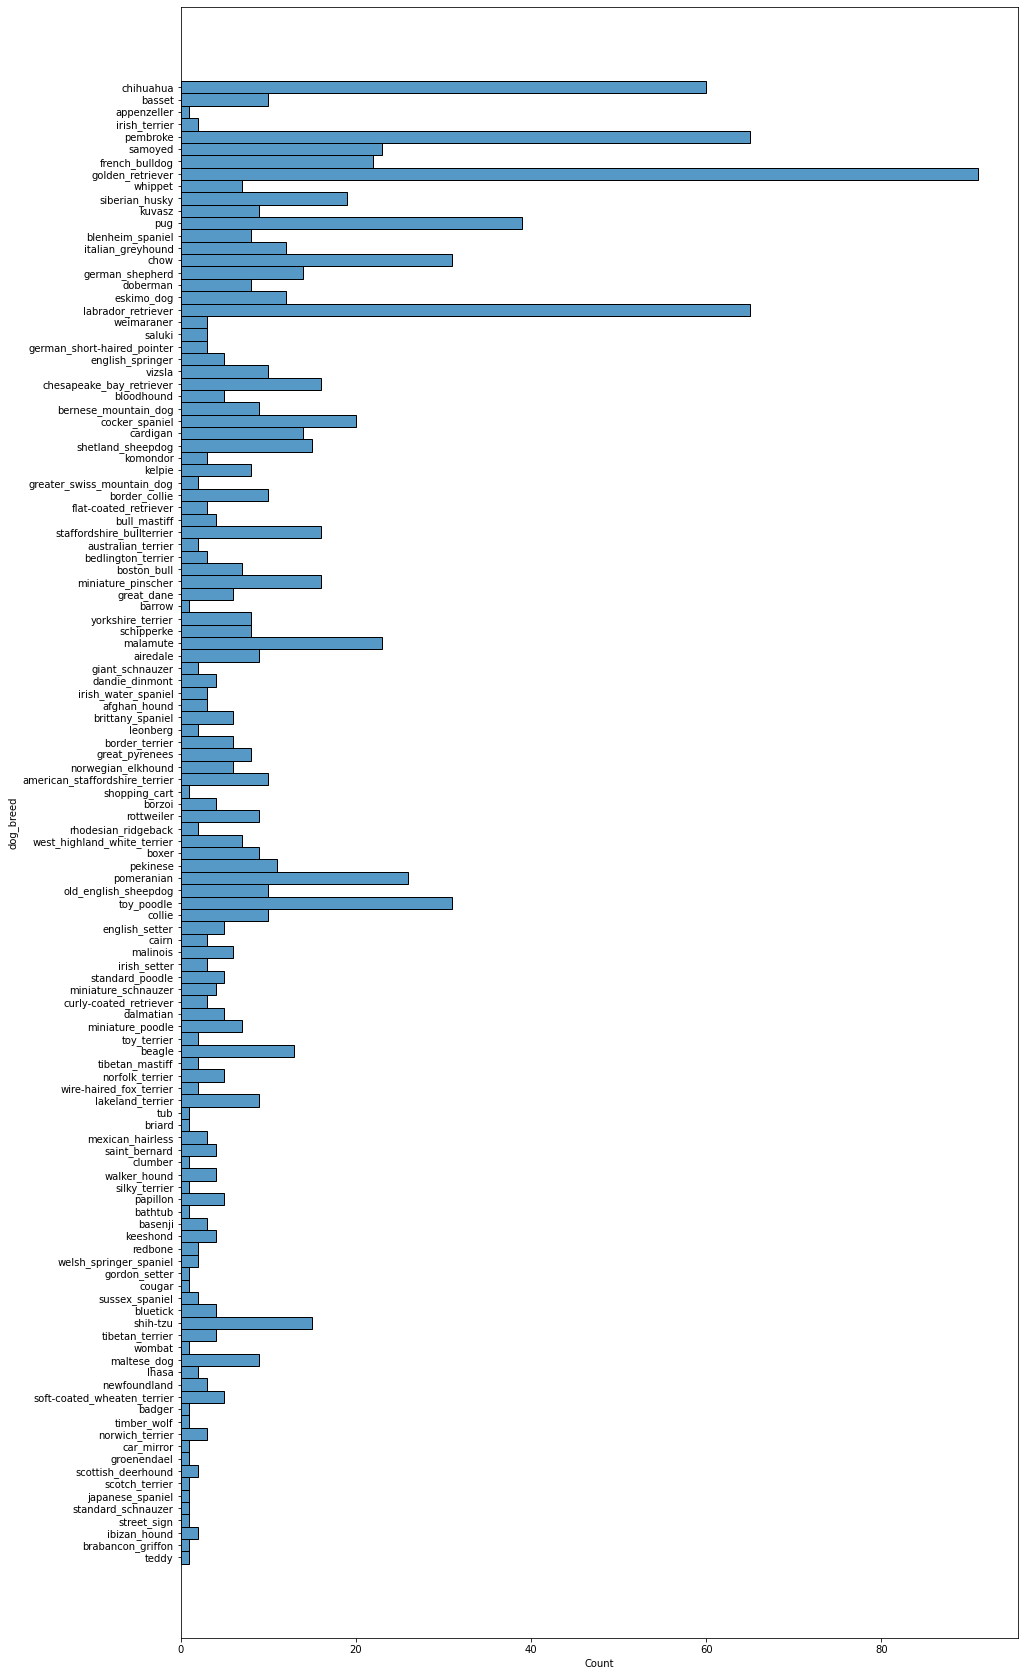

In [108]:
# Plot a histogram of dog_breed freq
dims = (15, 30)
fig, ax = pyplot.subplots(figsize=dims)
sns.histplot(ax=ax, y=df_clean['dog_breed'], stat="count");

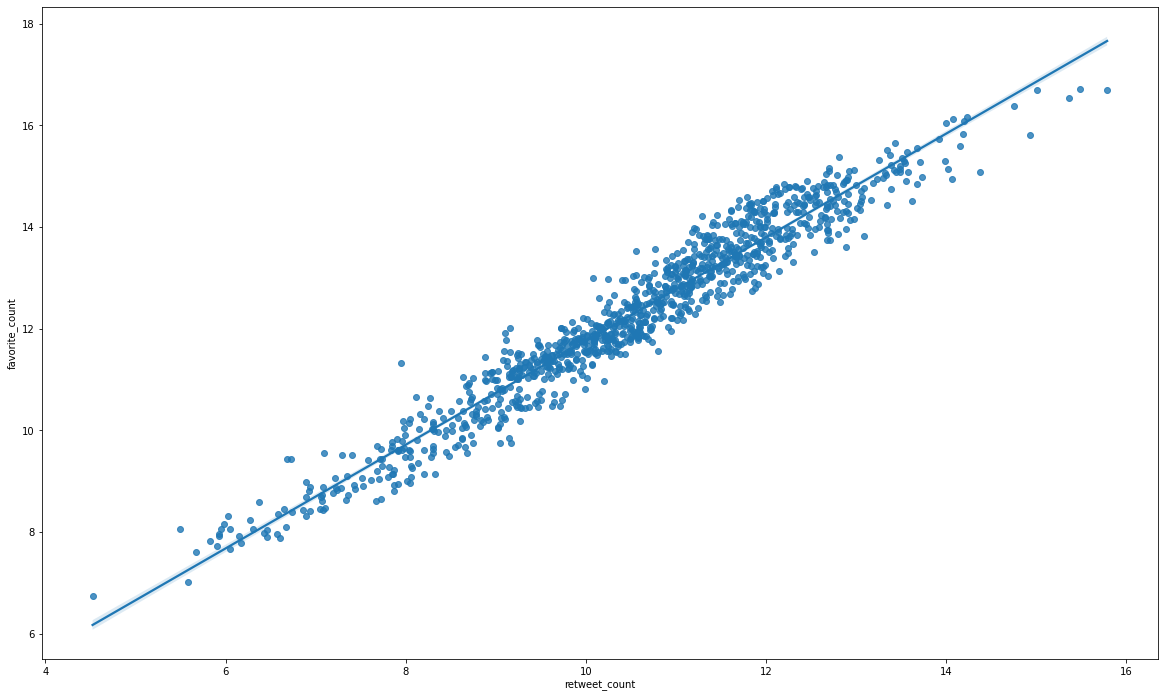

In [114]:
# visualise with a regression plot
dims = (20, 12)
fig, ax = pyplot.subplots(figsize=dims)
sns.regplot(ax=ax, x=np.log2(df_clean['retweet_count']), y=np.log2(df_clean['favorite_count']));

<a id='report'></a>
## Reporting